In [3]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('Bondora_raw.csv')

# TASK 1- DATA PREPROCESSING

In [5]:
len(df.columns)

112

In [6]:
df.columns

Index(['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC',
       'BiddingStartedOn', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'UserName', 'NewCreditCustomer',
       ...
       'PreviousEarlyRepaymentsCountBeforeLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'NextPaymentNr',
       'NrOfScheduledPayments', 'ReScheduledOn', 'PrincipalDebtServicingCost',
       'InterestAndPenaltyDebtServicingCost', 'ActiveLateLastPaymentCategory'],
      dtype='object', length=112)

In [7]:
df.index

RangeIndex(start=0, stop=134529, step=1)

In [8]:
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Columns: 112 entries, ReportAsOfEOD to ActiveLateLastPaymentCategory
dtypes: bool(3), float64(56), int64(14), object(39)
memory usage: 112.3+ MB


In [10]:
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', 500)
df.isnull().sum()

ReportAsOfEOD                                  0
LoanId                                         0
LoanNumber                                     0
ListedOnUTC                                    0
BiddingStartedOn                               0
BidsPortfolioManager                           0
BidsApi                                        0
BidsManual                                     0
UserName                                       0
NewCreditCustomer                              0
LoanApplicationStartedDate                     0
LoanDate                                       0
ContractEndDate                            75546
FirstPaymentDate                               0
MaturityDate_Original                          0
MaturityDate_Last                              0
ApplicationSignedHour                          0
ApplicationSignedWeekday                       0
VerificationType                              45
LanguageCode                                   0
Age                 

In [11]:
# removing the columns having more than 40% missing values
def percent_null(df):
    percent_null=df.isnull().sum()/len(df)*100
    percent_null=percent_null[percent_null>40]
    return percent_null

In [12]:
null_remove=percent_null(df)

In [13]:
len(null_remove)

36

In [14]:
null_remove.index

Index(['ContractEndDate', 'NrOfDependants', 'EmploymentPosition',
       'WorkExperience', 'PlannedPrincipalTillDate', 'CurrentDebtDaysPrimary',
       'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary', 'DefaultDate',
       'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1',
       'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'RecoveryStage',
       'EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2',
       'ActiveLateCategory', 'CreditScoreEsEquifaxRisk',
       'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini',
       'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs',
       'PreviousEarlyRepaymentsBefoleLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'ReScheduledOn',
       'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost',
       'ActiveLateLastPaymentCategory'],
      dtype='object')

In [15]:
# print missing values columns 
miss_cols=['ContractEndDate', 'NrOfDependants', 'EmploymentPosition',
       'WorkExperience', 'PlannedPrincipalTillDate', 'CurrentDebtDaysPrimary',
       'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary',
       'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1',
       'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'RecoveryStage',
       'EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2',
       'ActiveLateCategory', 'CreditScoreEsEquifaxRisk',
       'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini',
       'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs',
       'PreviousEarlyRepaymentsBefoleLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'ReScheduledOn',
       'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost',
       'ActiveLateLastPaymentCategory']

In [16]:
len(miss_cols)

35

In [17]:
df=df.drop(miss_cols,axis=1)

In [18]:
df.shape

(134529, 77)

In [19]:
cols_del = ['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth',
       'BiddingStartedOn','UserName','NextPaymentNr','NrOfScheduledPayments','IncomeFromPrincipalEmployer',
        'IncomeFromPension','IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare','IncomeFromLeavePay',
        'IncomeFromChildSupport', 'IncomeOther','LoanApplicationStartedDate','ApplicationSignedHour',
        'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate','ExpectedLoss', 
        'LossGivenDefault', 'ExpectedReturn','ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory']

In [20]:
df=df.drop(cols_del,axis=1)

In [21]:
df.shape

(134529, 48)

### Creating Target Variable

In [22]:
#counts of each status categories 
df['Status'].value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

In [23]:
df['Status'][df['Status']=='Current']

491       Current
523       Current
536       Current
541       Current
544       Current
           ...   
134429    Current
134455    Current
134483    Current
134486    Current
134491    Current
Name: Status, Length: 57135, dtype: object

In [24]:
df['var']= df['DefaultDate'].isnull()

In [25]:
def target(var):
    if var==True:
        return 0
    else:
        return 1

In [26]:
df['target_var']=df['var'].apply(target)

In [27]:
df['target_var']

0         0
1         0
2         1
3         0
4         1
         ..
134524    1
134525    0
134526    1
134527    1
134528    1
Name: target_var, Length: 134529, dtype: int64

In [28]:
df['target_var'].value_counts()

0    91614
1    42915
Name: target_var, dtype: int64

In [29]:
drop_cols=['Status','DefaultDate','var']

In [30]:
df=df.drop(drop_cols,axis=1)

In [31]:
df.shape

(134529, 47)

## CHECKING FOR DATA TYPES

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Data columns (total 47 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   BidsPortfolioManager                    134529 non-null  int64  
 1   BidsApi                                 134529 non-null  int64  
 2   BidsManual                              134529 non-null  float64
 3   NewCreditCustomer                       134529 non-null  bool   
 4   LoanDate                                134529 non-null  object 
 5   FirstPaymentDate                        134529 non-null  object 
 6   MaturityDate_Original                   134529 non-null  object 
 7   MaturityDate_Last                       134529 non-null  object 
 8   VerificationType                        134484 non-null  float64
 9   LanguageCode                            134529 non-null  int64  
 10  Age                                     1345

First we will delete all the features related to date as it is not a time series analysis so these features will not help in predicting target variable.

As we can see in numeric column distribution there are many columns which are present as numeric but they are actually categorical as per data description such as Verification Type, Language Code, Gender, Use of Loan, Education, Marital 

Status,EmployementStatus, OccupationArea etc.
So we will convert these features to categorical features

***Now we will check the distribution of different categorical variables***

| Feature                                | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|----------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ActiveLateCategory                     | When a loan is in Principal Debt then it will be categorized by Principal Debt days                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| ActiveLateLastPaymentCategory          | Shows how many days has passed since last payment and categorised if it is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| ActiveScheduleFirstPaymentReached      | Whether the first payment date has been reached according to the active schedule                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| Age                                    | The age of the borrower when signing the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Amount                                 | Amount the borrower received on the Primary Market. This is the principal balance of your purchase from Secondary Market                                                                                                                                                                                                                                                                                                                                                                                            |
| AmountOfPreviousLoansBeforeLoan        | Value of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| AppliedAmount                          | The amount borrower applied for originally                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| AuctionBidNumber                       | Unique bid number which is accompanied by Auction number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| AuctionId                              | A unique number given to all auctions                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| AuctionName                            | Name of the Auction, in newer loans it is defined by the purpose of the loan                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| AuctionNumber                          | Unique auction number which is accompanied by Bid number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| BidPrincipal                           | On Primary Market BidPrincipal is the amount you made your bid on. On Secondary Market BidPrincipal is the purchase price                                                                                                                                                                                                                                                                                                                                                                                           |
| BidsApi                                | The amount of investment offers made via Api                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| BidsManual                             | The amount of investment offers made manually                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| BidsPortfolioManager                   | The amount of investment offers made by Portfolio Managers                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| BoughtFromResale_Date                  | The time when the investment was purchased from the Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| City                                   | City of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ContractEndDate                        | The date when the loan contract ended                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| Country                                | Residency of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| County                                 | County of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| CreditScoreEeMini                      | 1000 No previous payments problems 900 Payments problems finished 24-36 months ago 800 Payments problems finished 12-24 months ago 700 Payments problems finished 6-12 months ago 600 Payment problems finished < 6 months ago 500 Active payment problems                                                                                                                                                                                                                                                          |
| CreditScoreEsEquifaxRisk               | Generic score for the loan applicants that do not have active past due operations in ASNEF; a measure of the probability of default one year ahead; the score is given on a 6-grade scale: AAA (“Very low”), AA (“Low”), A (“Average”), B (“Average High”), C (“High”), D (“Very High”).                                                                                                                                                                                                                            |
| CreditScoreEsMicroL                    | A score that is specifically designed for risk classifying subprime borrowers (defined by Equifax as borrowers that do not have access to bank loans); a measure of the probability of default one month ahead; the score is given on a 10-grade scale, from the best score to the worst: M1, M2, M3, M4, M5, M6, M7, M8, M9, M10.                                                                                                                                                                                  |
| CreditScoreFiAsiakasTietoRiskGrade     | Credit Scoring model for Finnish Asiakastieto RL1 Very low risk 01-20 RL2 Low risk 21-40 RL3 Average risk 41-60 RL4 Big risk 61-80 RL5 Huge risk 81-100                                                                                                                                                                                                                                                                                                                                                             |
| CurrentDebtDaysPrimary                 | How long the loan has been in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| CurrentDebtDaysSecondary               | How long the loan has been in Interest Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| DateOfBirth                            | The date of the borrower's birth                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| DebtOccuredOn                          | The date when Principal Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| DebtOccuredOnForSecondary              | The date when Interest Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| DebtToIncome                           | Ratio of borrower's monthly gross income that goes toward paying loans                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| DefaultDate                            | The date when loan went into defaulted state and collection process was started                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| DesiredDiscountRate                    | Investment being sold at a discount or premium                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| EAD1                                   | Exposure at default, outstanding principal at default                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| EAD2                                   | Exposure at default, loan amount less all payments prior to default                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Education                              | 1 Primary education 2 Basic education 3 Vocational education 4 Secondary education 5 Higher education                                                                                                                                                                                                                                                                                                                                                                                                               |
| EL_V0                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V1                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V2                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EmploymentDurationCurrentEmployer      | Employment time with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| EmploymentPosition                     | Employment position with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| EmploymentStatus                       | 1 Unemployed 2 Partially employed 3 Fully employed 4 Self-employed 5 Entrepreneur 6 Retiree                                                                                                                                                                                                                                                                                                                                                                                                                         |
| ExistingLiabilities                    | Borrower's number of existing liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ExpectedLoss                           | Expected Loss calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ExpectedReturn                         | Expected Return calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| FirstPaymentDate                       | First payment date according to initial loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| FreeCash                               | Discretionary income after monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| Gender                                 | 0 Male 1 Woman 2 Undefined                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| GracePeriodEnd                         | Date of the end of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| GracePeriodStart                       | Date of the beginning of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| HomeOwnershipType                      | 0 Homeless 1 Owner 2 Living with parents 3 Tenant, pre-furnished property 4 Tenant, unfurnished property 5 Council house 6 Joint tenant 7 Joint ownership 8 Mortgage 9 Owner with encumbrance 10 Other                                                                                                                                                                                                                                                                                                              |
| IncomeFromChildSupport                 | Borrower's income from alimony payments                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| IncomeFromFamilyAllowance              | Borrower's income from child support                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeFromLeavePay                     | Borrower's income from paternity leave                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| IncomeFromPension                      | Borrower's income from pension                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| IncomeFromPrincipalEmployer            | Borrower's income from its employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| IncomeFromSocialWelfare                | Borrower's income from social support                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| IncomeOther                            | Borrower's income from other sources                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeTotal                            | Borrower's total income                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Interest                               | Maximum interest rate accepted in the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyBalance              | Unpaid interest and penalties                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| InterestAndPenaltyDebtServicingCost    | Service cost related to the recovery of the debt based on the interest and penalties of the investment                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyPaymentsMade         | Note owner received loan transfers earned interest, penalties total amount                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| InterestAndPenaltyWriteOffs            | Interest that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| InterestLateAmount                     | Interest debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| InterestRecovery                       | Interest recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LanguageCode                           | 1 Estonian 2 English 3 Russian 4 Finnish 5 German 6 Spanish 9 Slovakian                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| LastPaymentOn                          | The date of the current last payment received from the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LiabilitiesTotal                       | Total monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ListedOnUTC                            | Date when the loan application appeared on Primary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| LoanDate                               | Date when the loan was issued                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| LoanDuration                           | Current loan duration in months                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LoanId                                 | A unique ID given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| LoanNumber                             | A unique number given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| LoanStatusActiveFrom                   | How long the current status has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| LossGivenDefault                       | Gives the percentage of outstanding exposure at the time of default that an investor is likely to lose if a loan actually defaults. This means the proportion of funds lost for the investor after all expected recovery and accounting for the time value of the money recovered. In general, LGD parameter is intended to be estimated based on the historical recoveries. However, in new markets where limited experience does not allow us more precise loss given default estimates, a LGD of 90% is assumed. |
| MaritalStatus                          | 1 Married 2 Cohabitant 3 Single 4 Divorced 5 Widow                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| MaturityDate_Last                      | Loan maturity date according to the current payment schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| MaturityDate_Original                  | Loan maturity date according to the original loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| ModelVersion                           | The version of the Rating model used for issuing the Bondora Rating                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| MonthlyPayment                         | Estimated amount the borrower has to pay every month                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| MonthlyPaymentDay                      | The day of the month the loan payments are scheduled for The actual date is adjusted for weekends and bank holidays (e.g. if 10th is Sunday then the payment will be made on the 11th in that month)                                                                                                                                                                                                                                                                                                                |
| NewCreditCustomer                      | Did the customer have prior credit history in Bondora 0 Customer had at least 3 months of credit history in Bondora 1 No prior credit history in Bondora                                                                                                                                                                                                                                                                                                                                                            |
| NextPaymentDate                        | According to schedule the next date for borrower to make their payment                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NextPaymentNr                          | According to schedule the number of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NextPaymentSum                         | According to schedule the amount of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoOfPreviousLoansBeforeLoan            | Number of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| note_id                                | A unique ID given to the investments                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoteLoanLateChargesPaid                | The amount of late charges the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| NoteLoanTransfersInterestAmount        | The amount of interest the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| NoteLoanTransfersMainAmount            | The amount of principal the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| NrOfDependants                         | Number of children or other dependants                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NrOfScheduledPayments                  | According to schedule the count of scheduled payments                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| OccupationArea                         | 1 Other 2 Mining 3 Processing 4 Energy 5 Utilities 6 Construction 7 Retail and wholesale 8 Transport and warehousing 9 Hospitality and catering 10 Info and telecom 11 Finance and insurance 12 Real-estate 13 Research 14 Administrative 15 Civil service & military 16 Education 17 Healthcare and social help 18 Art and entertainment 19 Agriculture, forestry and fishing                                                                                                                                      |
| OnSaleSince                            | Time when the investment was added to Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| PenaltyLateAmount                      | Late charges debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PlannedInterestPostDefault             | The amount of interest that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| PlannedInterestTillDate                | According to active schedule the amount of interest the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PlannedPrincipalPostDefault            | The amount of principal that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| PlannedPrincipalTillDate               | According to active schedule the amount of principal the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PreviousEarlyRepaymentsBeforeLoan      | How much was the early repayment amount before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PreviousEarlyRepaymentsCountBeforeLoan | How many times the borrower had repaid early                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PreviousRepaymentsBeforeLoan           | How much the borrower had repaid before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalBalance                       | Principal that still needs to be paid by the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalDebtServicingCost             | Service cost related to the recovery of the debt based on the principal of the investment                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PrincipalLateAmount                    | Principal debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalOverdueBySchedule             | According to the current schedule, principal that is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PrincipalPaymentsMade                  | Note owner received loan transfers principal amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| PrincipalRecovery                      | Principal recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalWriteOffs                     | Principal that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ProbabilityOfDefault                   | Probability of Default, refers to a loan’s probability of default within one year horizon.                                                                                                                                                                                                                                                                                                                                                                                                                          |
| PurchasePrice                          | Investment amount or secondary market purchase price                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Rating                                 | Bondora Rating issued by the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Rating_V0                              | Bondora Rating issued by version 0 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V1                              | Bondora Rating issued by version 1 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V2                              | Bondora Rating issued by version 2 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| RecoveryStage                          | Current stage according to the recovery model 1 Collection 2 Recovery 3 Write Off                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| RefinanceLiabilities                   | The total amount of liabilities after refinancing                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| ReScheduledOn                          | The date when the a new schedule was assigned to the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| Restructured                           | The original maturity date of the loan has been increased by more than 60 days                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| SoldInResale_Date                      | The date when the investment was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| SoldInResale_Price                     | The price of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| SoldInResale_Principal                 | The principal remaining of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| StageActiveSince                       | How long the current recovery stage has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Status                                 | The current status of the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| UseOfLoan                              | 0 Loan consolidation 1 Real estate 2 Home improvement 3 Business 4 Education 5 Travel 6 Vehicle 7 Other 8 Health 101 Working capital financing 102 Purchase of machinery equipment 103 Renovation of real estate 104 Accounts receivable financing 105 Acquisition of means of transport 106 Construction finance 107 Acquisition of stocks 108 Acquisition of real estate 109 Guaranteeing obligation 110 Other business All codes in format 1XX are for business loans that are not supported since October 2012  |
| UserName                               | The user name generated by the system for the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| VerificationType                       | Method used for loan application data verification 0 Not set 1 Income unverified 2 Income unverified, cross-referenced by phone 3 Income verified 4 Income and expenses verified                                                                                                                                                                                                                                                                                                                                    |
| WorkExperience                         | Borrower's overall work experience in years                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| WorseLateCategory                      | Displays the last longest period of days when the loan was in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| XIRR                                   | XIRR (extended internal rate of return) is a methodology to calculate the net return using the loan issued date and amount, loan repayment dates and amounts and the principal balance according to the original repayment date. All overdue principal payments are written off immediately. No provisions for future losses are made & only received (not accrued or scheduled) interest payments are taken into account.                                                                                          |

In [33]:
#for date time data types
date_time = ['LoanDate', 'FirstPaymentDate', 'MaturityDate_Original',
       'MaturityDate_Last', 'LastPaymentOn']


In [34]:
df=df.drop(date_time,axis=1)

In [35]:
df_objs = df.select_dtypes(include='object')
df_objs.columns

Index(['Country', 'County', 'City', 'EmploymentDurationCurrentEmployer',
       'Rating', 'CreditScoreEsMicroL'],
      dtype='object')

In [36]:
df_nums = df.select_dtypes(exclude='object')
df_nums.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'VerificationType', 'LanguageCode', 'Age', 'Gender', 'AppliedAmount',
       'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment', 'UseOfLoan',
       'Education', 'MaritalStatus', 'EmploymentStatus', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'MonthlyPaymentDay', 'Restructured', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'target_var'],
      dtype='object')

### checking for categorical values

In [37]:
# write your code here for VerificationType
df["VerificationType"].value_counts()

4.0    74572
1.0    48648
3.0     9428
2.0     1828
0.0        8
Name: VerificationType, dtype: int64

In [38]:
replace_VerificationType = {0:'Not Set',1:'Income unverified',2:'Income unverified, cross-referenced by phone',
                            3:'Income verified',4:'Income and expenses verified'}

In [39]:
df['VerificationType'] = df['VerificationType'].map(replace_VerificationType) 

In [40]:
df["VerificationType"].value_counts()

Income and expenses verified                    74572
Income unverified                               48648
Income verified                                  9428
Income unverified, cross-referenced by phone     1828
Not Set                                             8
Name: VerificationType, dtype: int64

In [41]:
# write your code here Gender
df["Gender"].value_counts()

0.0    85650
1.0    38213
2.0    10621
Name: Gender, dtype: int64

In [42]:
replace_gender={0:'Male',1:'Women',2:'Undefined'  }

In [43]:
df['Gender'] = df['Gender'].map(replace_gender) 

In [44]:
df["Gender"].value_counts()

Male         85650
Women        38213
Undefined    10621
Name: Gender, dtype: int64

In [45]:
# write your code here LanguageCode
df["LanguageCode"].value_counts()

1     64299
4     32155
6     24103
3     12694
2       967
9       295
22        6
5         5
15        1
10        1
13        1
7         1
21        1
Name: LanguageCode, dtype: int64

In [46]:
# write your code here
replace_languagecode = [None, 'Estonian', 'English', 'Russian', 'Finnish', 'German', 'Spanish', 7, 8, 'Slovakian']
for n, i in enumerate(replace_languagecode):
    df["LanguageCode"][df["LanguageCode"]==n] = i
df["LanguageCode"][~(df["LanguageCode"].str.isnumeric()==False)] = 'Other'
df["LanguageCode"].value_counts()

Estonian     64299
Finnish      32155
Spanish      24103
Russian      12694
English        967
Slovakian      295
Other           11
German           5
Name: LanguageCode, dtype: int64

In [47]:
# write your code here for UseOfLoan
df["UseOfLoan"].value_counts()

-1      97946
 7       9698
 2       9191
 0       6914
 6       3150
 3       1950
 5       1787
 8       1519
 4       1366
 1        955
 102       21
 110       17
 104        6
 101        5
 107        2
 108        1
 106        1
Name: UseOfLoan, dtype: int64

In [48]:
replace_UseOfLoan={-1:'Not set',0:'Loan consolidation',1:'Real estate',2:'Home improvement',3:'Business',4:'Education',
                   5:'Travel',6:'Vehicle',7:'Other',8:'Health',}

In [49]:
df['UseOfLoan'] = df['UseOfLoan'].map(replace_UseOfLoan)

In [50]:
df["UseOfLoan"].value_counts()

Not set               97946
Other                  9698
Home improvement       9191
Loan consolidation     6914
Vehicle                3150
Business               1950
Travel                 1787
Health                 1519
Education              1366
Real estate             955
Name: UseOfLoan, dtype: int64

In [51]:
# write your code here for Education
df["Education"].value_counts()

 4.0    51330
 5.0    35398
 3.0    29260
 1.0    12057
 2.0     6427
 0.0        8
-1.0        4
Name: Education, dtype: int64

In [52]:
replace_Education={-1:'Not_present',1:'Primary education',2:'Basic education',3:'Vocational education',
                   4:'Secondary education',5:'Higher education',}

In [53]:
df['Education'] = df['Education'].map(replace_Education) 

In [54]:
df["Education"].value_counts()

Secondary education     51330
Higher education        35398
Vocational education    29260
Primary education       12057
Basic education          6427
Not_present                 4
Name: Education, dtype: int64

In [55]:
# write your code here for MaritalStatus
df["MaritalStatus"].value_counts()

-1.0    97946
 3.0    12400
 1.0    10752
 2.0     9400
 4.0     3377
 5.0      601
 0.0        8
Name: MaritalStatus, dtype: int64

In [56]:
replace_MaritialStatus={-1:'Not_specified',1:'Married',2:'Cohabitant',3:'Single',4:'Divorced',5:'Widow'}

In [57]:
df['MaritalStatus'] = df['MaritalStatus'].map(replace_MaritialStatus) 

In [58]:
df["MaritalStatus"].value_counts()

Not_specified    97946
Single           12400
Married          10752
Cohabitant        9400
Divorced          3377
Widow              601
Name: MaritalStatus, dtype: int64

In [59]:
# write your code here for EmploymentStatus
df["EmploymentStatus"].value_counts()

-1.0    97946
 3.0    30060
 5.0     2007
 6.0     1800
 4.0     1303
 2.0     1184
 0.0       32
Name: EmploymentStatus, dtype: int64

In [60]:
replace_EmploymentStatus={-1:'Not_specified',1:'Unemployed',2:'Partially employed',3:'Fully employed',4:'Self-employed',
                          5:'Entrepreneur',   5:'Retiree'}

In [61]:
df['EmploymentStatus'] = df['EmploymentStatus'].map(replace_EmploymentStatus)  

In [62]:
df["EmploymentStatus"].value_counts()

Not_specified         97946
Fully employed        30060
Retiree                2007
Self-employed          1303
Partially employed     1184
Name: EmploymentStatus, dtype: int64

In [63]:
# write your code here for OccupationArea
df["OccupationArea"].value_counts()

-1.0     97997
 1.0      8421
 7.0      3587
 6.0      3312
 3.0      3198
 8.0      2462
 17.0     2424
 9.0      2262
 10.0     1933
 15.0     1684
 16.0     1430
 11.0     1148
 19.0     1000
 14.0      843
 18.0      619
 4.0       587
 13.0      564
 12.0      477
 5.0       362
 2.0       122
 0.0        11
Name: OccupationArea, dtype: int64

In [64]:
replace_OccupationArea={-1:'Not_specified',1:'Other',2:'Mining',3:'Processing',4:'Energy',5:'Utilities',6:'Construction',
                        7:'Retail and wholesale',8:'Transport and warehousing',9:'Hospitality and catering',
                        10:'Info and telecom', 11:'Finance and insurance',12:'Real-estate',13:'Research',14:'Administrative',
                        15:'Civil service & military',16:'Education',17:'Healthcare and social help',18:'Art and entertainment'
                        ,19:'Agriculture, forestry and fishing'  }

In [65]:
df['OccupationArea'] = df['OccupationArea'].map(replace_OccupationArea) 

In [66]:
df["OccupationArea"].value_counts()

Not_specified                        97997
Other                                 8421
Retail and wholesale                  3587
Construction                          3312
Processing                            3198
Transport and warehousing             2462
Healthcare and social help            2424
Hospitality and catering              2262
Info and telecom                      1933
Civil service & military              1684
Education                             1430
Finance and insurance                 1148
Agriculture, forestry and fishing     1000
Administrative                         843
Art and entertainment                  619
Energy                                 587
Research                               564
Real-estate                            477
Utilities                              362
Mining                                 122
Name: OccupationArea, dtype: int64

In [67]:
# write your code here for counts of HomeOwnershipType
df["HomeOwnershipType"].value_counts()

 1.0     47334
 3.0     29579
 2.0     20780
 8.0     15457
 10.0     7956
 4.0      4582
 7.0      3337
 6.0      1618
 5.0      1442
 9.0       743
 0.0        46
-1.0         3
Name: HomeOwnershipType, dtype: int64

In [68]:
replace_HomeOwnershipType={-1:'Not_specified',0:'Homeless',1:'Owner',2:'Living with parents',3:'Tenant, pre-furnished property',
                           4:'Tenant, unfurnished property',5:'Council house',6:'Joint tenant',7:'Joint ownership',8:'Mortgage',
                           9:'Owner with encumbrance',10:'Other',}

In [69]:
df['HomeOwnershipType'] = df['HomeOwnershipType'].map(replace_HomeOwnershipType)

In [70]:
df["HomeOwnershipType"].value_counts()

Owner                             47334
Tenant, pre-furnished property    29579
Living with parents               20780
Mortgage                          15457
Other                              7956
Tenant, unfurnished property       4582
Joint ownership                    3337
Joint tenant                       1618
Council house                      1442
Owner with encumbrance              743
Homeless                             46
Not_specified                         3
Name: HomeOwnershipType, dtype: int64

In [71]:
# save the final data
df.to_csv('Bondora_preprocessed.csv',index=False)

In [72]:
df=pd.read_csv('Bondora_preprocessed.csv')

In [73]:
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,...,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,target_var
0,0,0,115.0410,True,"Income unverified, cross-referenced by phone",Estonian,61,Women,EE,319.5582,...,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,0
1,0,0,140.6057,False,"Income unverified, cross-referenced by phone",Estonian,48,Women,EE,191.7349,...,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,0
2,0,0,319.5580,True,"Income unverified, cross-referenced by phone",Estonian,58,Women,EE,319.5582,...,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,1
3,0,0,57.5205,True,"Income unverified, cross-referenced by phone",Estonian,23,Women,EE,127.8233,...,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,0
4,0,0,319.5582,True,"Income unverified, cross-referenced by phone",Estonian,25,Women,EE,319.5582,...,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,1


# TASK 2 - Exploratory Data Analysis (EDA)


In [74]:
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,...,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,target_var
0,0,0,115.0410,True,"Income unverified, cross-referenced by phone",Estonian,61,Women,EE,319.5582,...,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,0
1,0,0,140.6057,False,"Income unverified, cross-referenced by phone",Estonian,48,Women,EE,191.7349,...,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,0
2,0,0,319.5580,True,"Income unverified, cross-referenced by phone",Estonian,58,Women,EE,319.5582,...,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,1
3,0,0,57.5205,True,"Income unverified, cross-referenced by phone",Estonian,23,Women,EE,127.8233,...,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,0
4,0,0,319.5582,True,"Income unverified, cross-referenced by phone",Estonian,25,Women,EE,319.5582,...,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,1


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Data columns (total 42 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   BidsPortfolioManager                    134529 non-null  int64  
 1   BidsApi                                 134529 non-null  int64  
 2   BidsManual                              134529 non-null  float64
 3   NewCreditCustomer                       134529 non-null  bool   
 4   VerificationType                        134484 non-null  object 
 5   LanguageCode                            134529 non-null  object 
 6   Age                                     134529 non-null  int64  
 7   Gender                                  134484 non-null  object 
 8   Country                                 134529 non-null  object 
 9   AppliedAmount                           134529 non-null  float64
 10  Amount                                  1345

In [81]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BidsPortfolioManager,134529.0,966.452876,1355.686016,0.0000,155.00,465.0000,1218.0000,10625.00
BidsApi,134529.0,29.111664,150.159148,0.0000,0.00,0.0000,5.0000,7570.00
BidsManual,134529.0,559.332590,750.360512,0.0000,96.00,317.0000,729.0000,10630.00
Age,134529.0,40.819295,12.348693,0.0000,31.00,40.0000,50.0000,77.00
AppliedAmount,134529.0,2727.947540,2374.439168,31.9558,800.00,2125.0000,4145.0000,10632.00
Amount,134529.0,2543.872472,2170.128183,6.3900,744.00,2125.0000,3600.0000,10632.00
Interest,134529.0,35.889583,26.288644,3.0000,20.00,30.9300,40.4000,264.31
LoanDuration,134529.0,46.151573,15.202688,1.0000,36.00,48.0000,60.0000,60.00
MonthlyPayment,127844.0,119.083443,114.737919,0.0000,34.99,97.3800,157.5125,2368.54
IncomeTotal,134529.0,1724.150015,4970.165757,0.0000,857.00,1250.0000,1900.0000,1012019.00


In [82]:
df['target_var'].value_counts()

0    91614
1    42915
Name: target_var, dtype: int64

<AxesSubplot:xlabel='target_var', ylabel='count'>

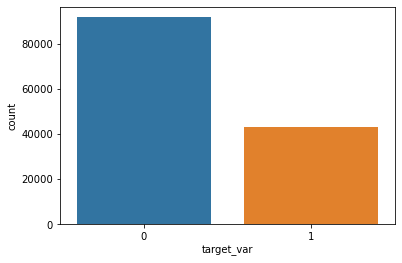

In [83]:
sns.countplot(data=df,x='target_var')

In [84]:
df.corr()['target_var'].sort_values()

NoOfPreviousLoansBeforeLoan              -0.145937
AmountOfPreviousLoansBeforeLoan          -0.145492
PrincipalPaymentsMade                    -0.103564
PreviousRepaymentsBeforeLoan             -0.090850
Age                                      -0.037703
InterestAndPenaltyPaymentsMade           -0.009271
LiabilitiesTotal                          0.000893
PreviousEarlyRepaymentsCountBeforeLoan    0.004930
Amount                                    0.007986
IncomeTotal                               0.008247
MonthlyPaymentDay                         0.009609
LoanDuration                              0.016449
BidsApi                                   0.023423
BidsManual                                0.023606
AppliedAmount                             0.062366
ExistingLiabilities                       0.062509
PrincipalBalance                          0.069148
FreeCash                                  0.094331
Restructured                              0.101866
MonthlyPayment                 

<AxesSubplot:xlabel='Age', ylabel='Count'>

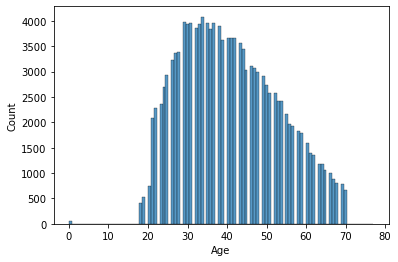

In [85]:
sns.histplot(data=df,x='Age')

<AxesSubplot:xlabel='Interest', ylabel='Count'>

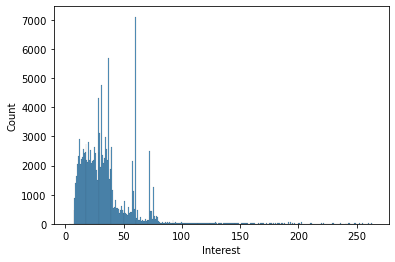

In [87]:
sns.histplot(data=df,x='Interest')

<AxesSubplot:xlabel='target_var', ylabel='InterestAndPenaltyBalance'>

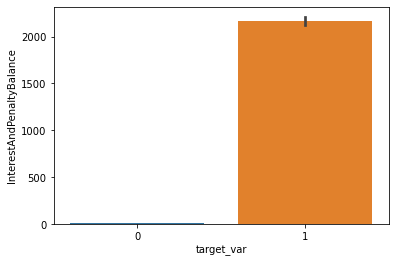

In [88]:
sns.barplot(x='target_var',y='InterestAndPenaltyBalance',data=df)

<AxesSubplot:xlabel='target_var', ylabel='DebtToIncome'>

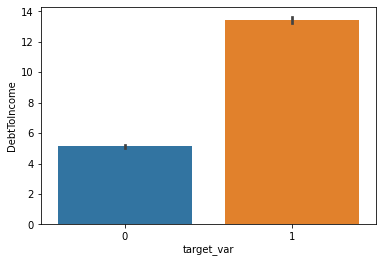

In [89]:
sns.barplot(x='target_var',y='DebtToIncome',data=df)

<AxesSubplot:xlabel='target_var', ylabel='Interest'>

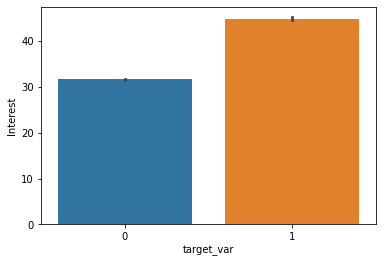

In [90]:
sns.barplot(x='target_var',y='Interest',data=df)

<AxesSubplot:xlabel='target_var', ylabel='BidsPortfolioManager'>

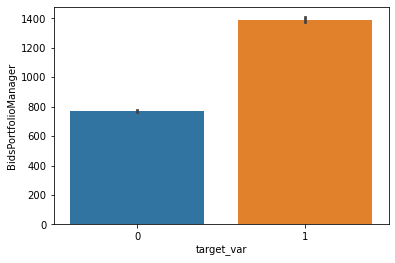

In [91]:
sns.barplot(x='target_var',y='BidsPortfolioManager',data=df)

<AxesSubplot:xlabel='target_var', ylabel='IncomeTotal'>

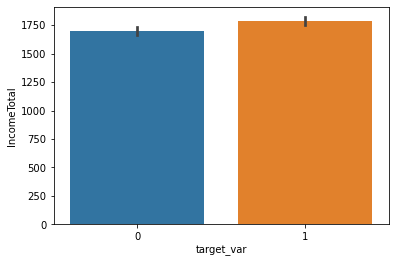

In [92]:
sns.barplot(x='target_var',y='IncomeTotal',data=df)

<AxesSubplot:>

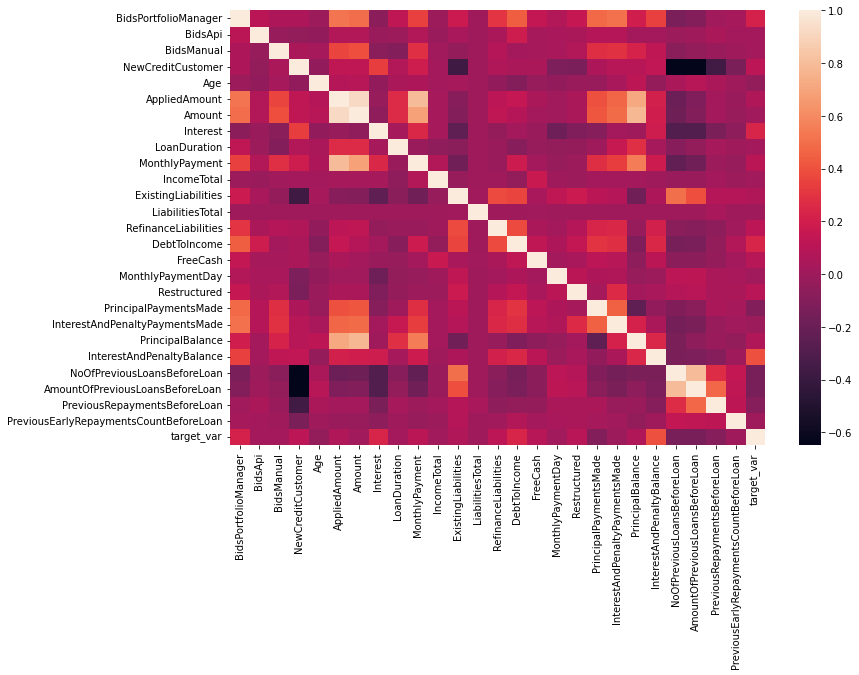

In [93]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [95]:
# save the final data
df.to_csv('Bondora_EDA.csv',index=False)